In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

# 自訂 function 可重新 reload
from importlib import reload
from utils import util_inference_result
reload(util_inference_result)
from utils.util_inference_result import *

# prediction

In [2]:

# 3_all
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_all/T200_beta00.0001_betaT0.02/imputaiton_multiple_40k/'
# dataset_folder = 'datasets/NYISO/dataset_3/all/'
# dataset_filename = 'load_array_all_test.npy'

# 3_CAPITL
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_CAPITL/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'CAPITL_test.npy'

# 3_CENTRL
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_CENTRL/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'CENTRL_test.npy'

# 3_DUNWOD
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_DUNWOD/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'DUNWOD_test.npy'

# 3_GENESE
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_GENESE/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'GENESE_test.npy'

# 3_HUD VL
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_HUD VL/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'HUD VL_test.npy'

# 3_LONGIL
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_LONGIL/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'LONGIL_test.npy'

# 3_MHK VL
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_MHK VL/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'MHK VL_test.npy'

# 3_MILLWD
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_MILLWD/T200_beta00.0001_betaT0.02/imputaiton_multiple/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'MILLWD_test.npy'

# 3_NYC
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_NYC/T200_beta00.0001_betaT0.02/imputaiton_multiple_50k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'N.Y.C._test.npy'

# 3_NORTH
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_NORTH/T200_beta00.0001_betaT0.02/imputaiton_multiple_50k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'NORTH_test.npy'

# 3_WEST
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_WEST/T200_beta00.0001_betaT0.02/imputaiton_multiple_50k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'WEST_test.npy'

In [3]:
pred_data = read_multiple_imputations(main_folder + result_folder, 24)
print(pred_data.shape)

file_path = os.path.join(main_folder + result_folder, 'original0.npy')
true_data = np.load(file_path)
print(true_data.shape)
true_data_target = true_data[:,:,-24:]
print(true_data_target.shape)

file_path = os.path.join(main_folder + dataset_folder, dataset_filename)
true_data_o = np.swapaxes(np.load(file_path), axis1=1, axis2=2)
print(true_data_o.shape)

true_data_o_cond = true_data_o[:,:,0:168]
print(true_data_o_cond.shape)
true_data_o_target = true_data_o[:,:,-24:]
print(true_data_o_target.shape)

(1, 73, 1, 24)
(73, 1, 192)
(73, 1, 24)
(73, 1, 192)
(73, 1, 168)
(73, 1, 24)


In [4]:
pred_mean = np.mean(pred_data, axis = 0)
print(pred_mean.shape)

m = np.mean(true_data_o_cond, axis=2).reshape((pred_mean.shape[0], pred_mean.shape[1], 1))
s = np.std(true_data_o_cond, axis=2).reshape((pred_mean.shape[0], pred_mean.shape[1], 1))

pred_mean_o = pred_mean*s + m
print(pred_mean_o.shape)


(73, 1, 24)
(73, 1, 24)


2016/10/23


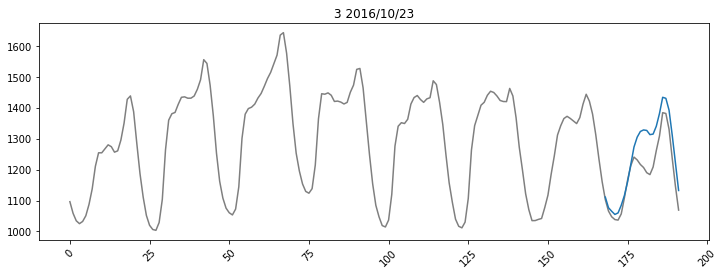

In [5]:
obs = 3
date = generate_date_from_seq(obs)
print(date)
x = range(0,192)
y = true_data_o[obs,0,:]
x_pred = range(168, 192)
y_pred = pred_mean_o[obs,0,:]


plt.figure(figsize=(12, 4)) 
plt.plot(x, y, color = 'tab:gray')
plt.plot(x_pred, y_pred, color = 'tab:blue')
plt.title(str(obs)+ ' ' +date)
plt.xticks(rotation=45) 
# plt.ylim(-2.5, 2.5) 
plt.show()



In [30]:
# for obs in range(50,60,1):
#     date = generate_date_from_seq(obs)
#     print(date)
#     x = range(0,192)
#     y = true_data_o[obs,0,:]
#     x_pred = range(168, 192)
#     y_pred = pred_mean_o[obs,0,:]


#     plt.figure(figsize=(12, 4)) 
#     plt.plot(x, y, color = 'tab:gray')
#     plt.plot(x_pred, y_pred, color = 'tab:blue')
#     # plt.title("mean prediction: " + date)
#     plt.xticks(rotation=45) 
#     # plt.ylim(-2.5, 2.5) 
#     plt.show()


# AR results

In [212]:
from sklearn.metrics import mean_squared_error

In [260]:
main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/results/'

# sub_folder = 'ar1-4/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'

# sub_folder = 'ar1-5/T200_beta00.0001_betaT0.02/imputaiton_multiple_10k_5/'
sub_folder = 'ar1-5/T200_beta00.0001_betaT0.02/imputaiton_multiple_10k/'

# sub_folder = 'ar1-8/T200_beta00.0001_betaT0.02/imputaiton_multiple_40k_5/'
# sub_folder = 'ar1-8/T200_beta00.0001_betaT0.02/imputaiton_multiple_60k/'




In [264]:
data = np.load(main_folder + sub_folder + 'original0.npy')

r_to_data = []
r_to_signal = []
for i in range(15):
    pred = np.load(main_folder + sub_folder + str(i) + '_imputation0.npy')
    r_to_signal.append(mean_squared_error(pred[:,:,-1], data[:,:,-2]*0.8))
    r_to_data.append(mean_squared_error(pred[:,:,-1], data[:,:,-1]))
    
print(np.mean(r_to_signal))
print(np.mean(r_to_data))


0.28973132
1.31421


In [265]:
r_to_signal

[0.2816327,
 0.28097236,
 0.28198382,
 0.29158396,
 0.29181853,
 0.29251042,
 0.28718218,
 0.29849902,
 0.29992566,
 0.2914626,
 0.3012169,
 0.28478357,
 0.2836309,
 0.29957828,
 0.27918914]

In [266]:
r_to_data

[1.3103466,
 1.320538,
 1.2949231,
 1.2992558,
 1.3151921,
 1.3108866,
 1.3001329,
 1.324904,
 1.3256792,
 1.3032825,
 1.331539,
 1.3132088,
 1.3159486,
 1.3383969,
 1.308917]

In [267]:
data = np.load(main_folder + sub_folder + 'original0.npy')

last_pred = np.expand_dims(np.empty(data.shape), axis = 0)

for i in range(15):
    pred = np.load(main_folder + sub_folder + str(i) + '_imputation0.npy')
    pred = np.expand_dims(pred, axis = 0)
    last_pred = np.vstack((last_pred, pred))


last_pred = last_pred[1:(last_pred.shape[0]+1),:,:,:]
m = np.mean(last_pred[:,:,:,-1], axis = 0)    

print(mean_squared_error(m[:,0], data[:,:,-2]*0.8))
print(mean_squared_error(m[:,0], data[:,:,-1]))


0.24558805676164894
1.270066789919949


(array([799., 116.,  51.,  15.,   7.,   6.,   1.,   1.,   1.,   3.]),
 array([0.00114523, 0.10768239, 0.21421955, 0.32075671, 0.42729387,
        0.53383103, 0.64036819, 0.74690535, 0.85344252, 0.95997968,
        1.06651684]),
 <BarContainer object of 10 artists>)

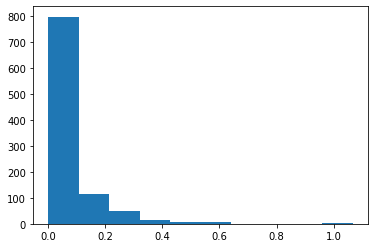

In [234]:
plt.hist(v)